In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

### Part 1
#### Visualize 5 Images from each class.

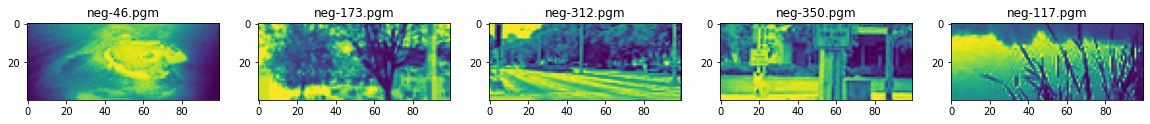

In [54]:
plt.figure(figsize=(20,20))
img_folder=r'D:/DATA_A5/negatives/'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

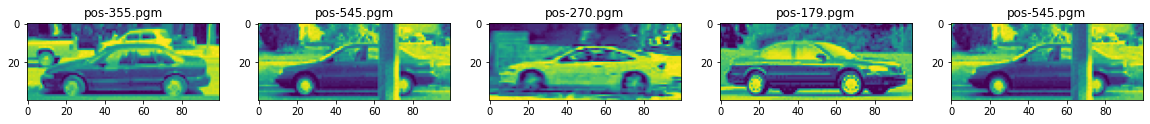

In [55]:
plt.figure(figsize=(20,20))
img_folder=r'D:/DATA_A5/positives//'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [2]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder = r'D:/DATA_A5/'

In [3]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(r'D:/DATA_A5')

In [4]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'negatives': 0, 'positives': 1}

In [5]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [6]:
target_val

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [7]:
X=np.array(img_data, np.float32)
y=np.array(list(map(int,target_val)), np.float32)

In [8]:
X

array([[[0.2784314 , 0.2784314 , 0.25490198, ..., 0.21176471,
         0.12941177, 0.12941177],
        [0.2784314 , 0.2784314 , 0.25490198, ..., 0.21176471,
         0.12941177, 0.12941177],
        [0.2784314 , 0.2784314 , 0.25490198, ..., 0.21176471,
         0.12941177, 0.12941177],
        ...,
        [0.7764706 , 0.7764706 , 0.7529412 , ..., 0.74509805,
         0.7764706 , 0.7764706 ],
        [0.7764706 , 0.7764706 , 0.7529412 , ..., 0.74509805,
         0.7764706 , 0.7764706 ],
        [0.7764706 , 0.7764706 , 0.7529412 , ..., 0.74509805,
         0.7764706 , 0.7764706 ]],

       [[0.29411766, 0.29411766, 0.3019608 , ..., 0.27058825,
         0.22352941, 0.22352941],
        [0.29411766, 0.29411766, 0.3019608 , ..., 0.27058825,
         0.22352941, 0.22352941],
        [0.29411766, 0.29411766, 0.3019608 , ..., 0.27058825,
         0.22352941, 0.22352941],
        ...,
        [0.94509804, 0.94509804, 0.94509804, ..., 0.7490196 ,
         0.80784315, 0.80784315],
        [0.9

In [9]:
X_new = X.reshape(X.shape[0], (X.shape[1]*X.shape[2]))

In [10]:
X_new

array([[0.2784314 , 0.2784314 , 0.25490198, ..., 0.74509805, 0.7764706 ,
        0.7764706 ],
       [0.29411766, 0.29411766, 0.3019608 , ..., 0.7490196 , 0.80784315,
        0.80784315],
       [0.04313726, 0.04313726, 0.03529412, ..., 0.28235295, 0.5568628 ,
        0.5568628 ],
       ...,
       [0.16470589, 0.16470589, 0.04705882, ..., 0.24313726, 0.21568628,
        0.21568628],
       [0.44705883, 0.44705883, 0.16078432, ..., 0.5294118 , 0.5294118 ,
        0.5294118 ],
       [0.38431373, 0.38431373, 0.36078432, ..., 0.5529412 , 0.5921569 ,
        0.5921569 ]], dtype=float32)

In [11]:
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Part 2

In [ ]:
This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

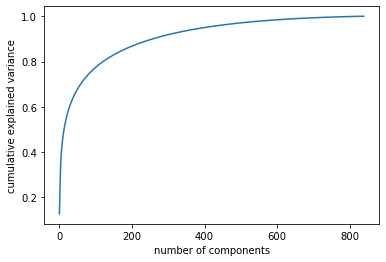

In [85]:
pca = PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
import sklearn as sl
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA 

pca = PCA(0.90)
X_train_new = pca.fit_transform(X_train_std) # << to retain the components in an object
X_test_new = pca.transform(X_test_std)

#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  256 ;
Total explained variance =  0.90036


### Part 3

In [122]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test_new)
print("Training_Accuracy:",accuracy_score(y_train,model.predict(X_train_new)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training_Accuracy: 1.0
Testing Accuracy: 0.9380952380952381


In [123]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test_new)


# Model Accuracy, how often is the classifier correct?
print("Training_Accuracy:",accuracy_score(y_train,model.predict(X_train_new)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training_Accuracy: 1.0
Testing Accuracy: 0.9285714285714286


In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True,kernel='rbf')



In [19]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)



In [125]:
from sklearn.ensemble import AdaBoostClassifier3

# Import Support Vector Classifier
from sklearn.linear_model import LogisticRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
lr = LogisticRegression(max_iter = 1500)

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=lr, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test_new)


# Model Accuracy, how often is the classifier correct?
print("Training_Accuracy:",accuracy_score(y_train,model.predict(X_train_new)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training_Accuracy: 1.0
Testing Accuracy: 0.9523809523809523


In [126]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
dt = DecisionTreeClassifier()

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=dt, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test_new)


# Model Accuracy, how often is the classifier correct?
print("Training_Accuracy:",accuracy_score(y_train,model.predict(X_train_new)))
print ("Testing Accuracy : ", accuracy_score(y_test,y_pred_acc))

Training_Accuracy: 1.0
Testing Accuracy :  0.9523809523809523


### Part 4

In [127]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10, 20,30,40,50,60,70,80,90,100],
              "learning_rate":[1,0.1,2,0.2,3,4,5,6,7,8]
             }

lr = LogisticRegression(max_iter=1500)

ABC = AdaBoostClassifier(base_estimator = lr)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(X_train_new, y_train)

#Predict values based on new parameters
y_pred_acc = grid_search_ABC.predict(X_test_new)
print("Training_Accuracy:",accuracy_score(y_train,grid_search_ABC.predict(X_train_new)))
print ("Testing Accuracy : ", accuracy_score(y_test,y_pred_acc))

Training_Accuracy: 1.0
Testing Accuracy :  0.9523809523809523


In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10, 20,30,40,50,60,70,80,90,100],
              "learning_rate":[1,0.1,2,0.2,3,4,5,6,7,8]
             }

dt = DecisionTreeClassifier()

ABC = AdaBoostClassifier(base_estimator = dt)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(X_train_new, y_train)

#Predict values based on new parameters
y_pred_acc = grid_search_ABC.predict(X_test_new)
print("Training_Accuracy:",accuracy_score(y_train,grid_search_ABC.predict(X_train_new)))
print ("Testing Accuracy : ", accuracy_score(y_test,y_pred_acc))

Training_Accuracy: 1.0
Testing Accuracy :  0.8857142857142857
